In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

In [3]:
data = pd.read_csv("C:/Users/Admin/Downloads/zip_data/customer_data.csv")

In [4]:
# 1 - Transaction Analysis

In [ ]:
# Total number of transactions

In [5]:
total_transactions = data['InvoiceNo'].nunique()
print("Total Transactions:", total_transactions)

Total Transactions: 25900


In [6]:
# Average Quantity per transaction

In [7]:
avg_quantity = data['Quantity'].mean()
print("Average Quantity per Transaction:", avg_quantity)

Average Quantity per Transaction: 9.55224954743324


In [9]:
# Total Revenue

In [10]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
total_revenue = data['TotalAmount'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 9747747.933999998


In [ ]:
# 2 - Descriptive Statistics

In [11]:
# Summarize key statistics for numeric columns

In [12]:
print("\nDescriptive Statistics:")
print(data[['Quantity', 'UnitPrice', 'TotalAmount']].describe())



Descriptive Statistics:
            Quantity      UnitPrice    TotalAmount
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114      17.987795
std       218.081158      96.759853     378.810824
min    -80995.000000  -11062.060000 -168469.600000
25%         1.000000       1.250000       3.400000
50%         3.000000       2.080000       9.750000
75%        10.000000       4.130000      17.400000
max     80995.000000   38970.000000  168469.600000


In [13]:
# 3 - Time-Series Analysis

In [14]:
# Convert InvoiceDate to datetime format

In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [16]:
# Add columns for year and month

In [17]:
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

In [18]:
# Calculate monthly revenue

In [19]:
monthly_revenue = data.groupby('YearMonth')['TotalAmount'].sum()

In [20]:
# Plot monthly revenue

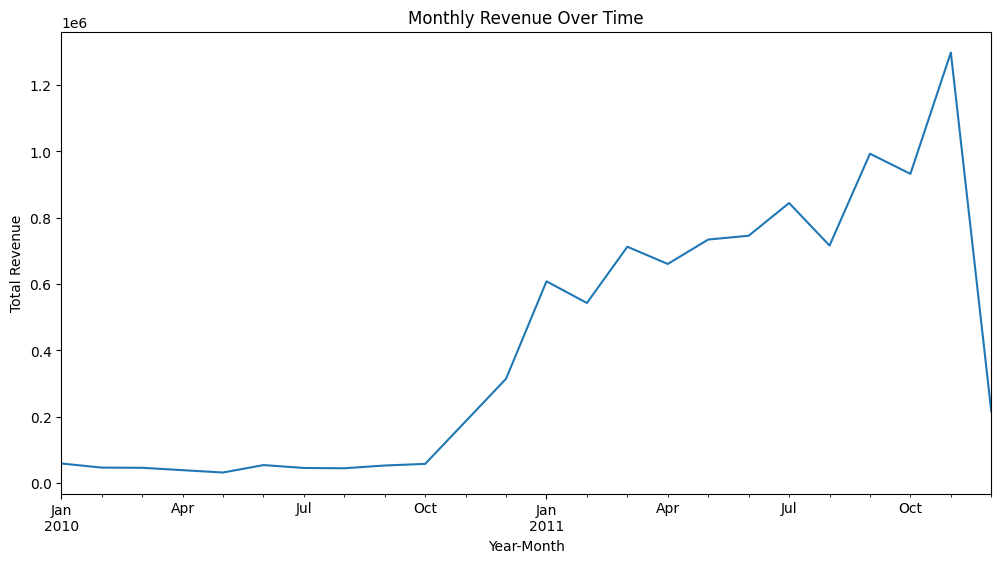

In [21]:
plt.figure(figsize=(12, 6))
monthly_revenue.plot()
plt.title("Monthly Revenue Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.show()

In [22]:
# 4 - Item-Level Analysis

In [23]:
# Top 10 most purchased items by quantity

In [24]:
top_items = data.groupby('Description')['Quantity'].sum().nlargest(10)
print("\nTop 10 Most Purchased Items by Quantity:")
print(top_items)


Top 10 Most Purchased Items by Quantity:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


In [25]:
# Plot top 10 items by revenue

In [27]:
top_revenue_items = data.groupby('Description')['TotalAmount'].sum().nlargest(10)


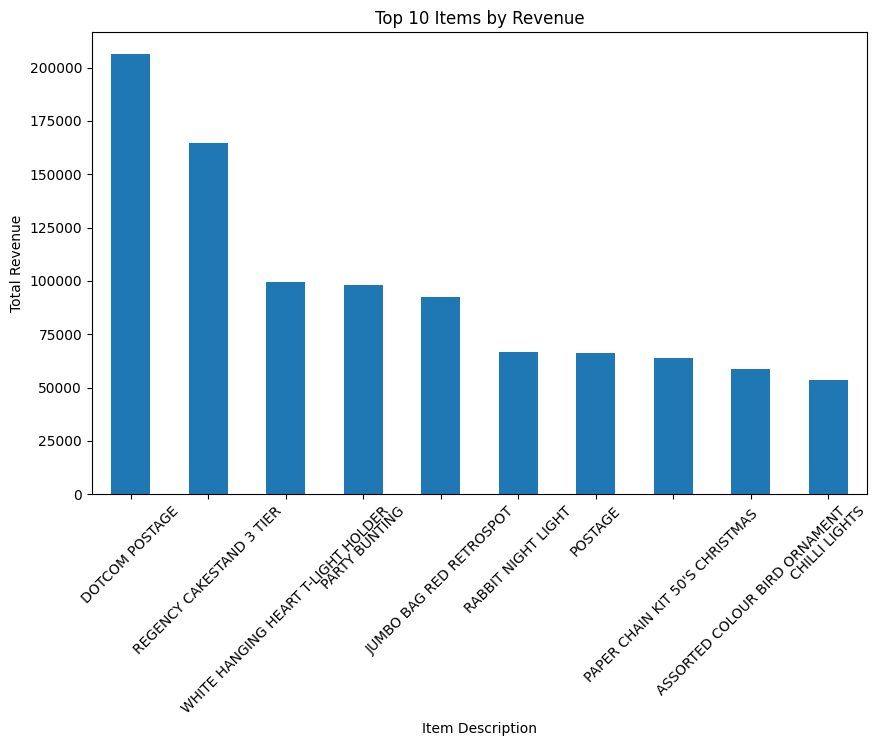

In [28]:
plt.figure(figsize=(10, 6))
top_revenue_items.plot(kind='bar')
plt.title("Top 10 Items by Revenue")
plt.xlabel("Item Description")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [29]:
# 5 - Optional: Customer Segmentation with KMeans

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
# Drop rows with missing CustomerID

In [32]:
customer_data = data.dropna(subset=['CustomerID'])

In [33]:
# Aggregate data by CustomerID

In [34]:
customer_df = customer_data.groupby('CustomerID').agg({
    'TotalAmount': 'sum',
    'Quantity': 'mean',
    'InvoiceNo': 'nunique'
}).rename(columns={'Quantity': 'AvgQuantity', 'InvoiceNo': 'TransactionCount'}).reset_index()

In [35]:
# Standardize features

In [36]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[['TotalAmount', 'AvgQuantity', 'TransactionCount']])

In [37]:
# Apply KMeans with k=4 (adjustable)

In [38]:
kmeans = KMeans(n_clusters=4, random_state=0)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)


In [39]:
# Visualize clusters

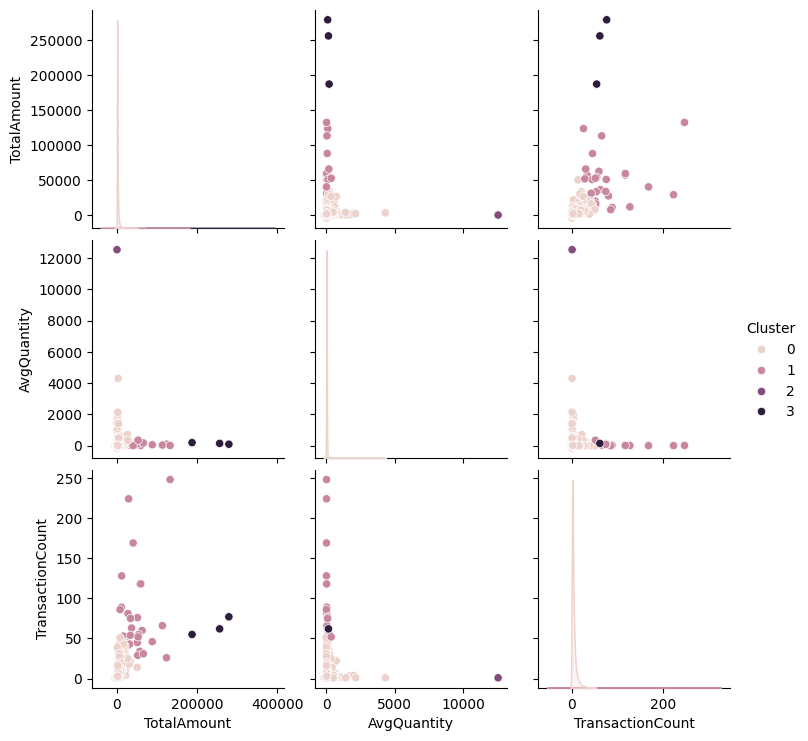

In [40]:
sns.pairplot(customer_df, hue='Cluster', vars=['TotalAmount', 'AvgQuantity', 'TransactionCount'])
plt.show()